# 04_Beginning of Deeplearning - XOR - 2

## `분류문제` 풀기

In [7]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# `One Hot Encoding`
![](./lecture_image/04-01.png)

In [9]:
# sklean의 one hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
                    # sparse : Will return sparse matrix if set True else will return an array.
                                    # handle_unknown :     Specifies the way unknown categories are handled during transform.
                                        # 'error' : Raise an error if an unknown category is present during transform.
                                        # 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. 
                                        #            In the inverse transform, an unknown category will be denoted as None.
                                        # 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. 
                                        #           The infrequent category will be mapped to the last position in the encoding. 
                                        #           During inverse transform, an unknown category will be mapped to the category denoted 'infrequent' if it exists. 
                                        #           If the 'infrequent' category does not exist, then transform and inverse_transform will handle an unknown category as with handle_unknown='ignore'. 
                                        #           Infrequent categories exist based on min_frequency and max_categories. Read more in the User Guide <one_hot_encoder_infrequent_categories>.

enc.fit(y.reshape(len(y),1))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [10]:
enc.categories_

[array([0, 1, 2])]

In [11]:
y_onehot = enc.transform(y.reshape(len(y),1))
y_onehot[:3]    # vergicala

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [12]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=13)

In [14]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=(4,), activation = 'relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax'),
])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-05-31 13:29:50.915914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-31 13:29:50.916753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# `모델 모양`
![](./lecture_image/04-02.png)

In [15]:
# adam
model.compile(optimizer = 'adam', loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist = model.fit(X_train, y_train, epochs=100)

2022-05-31 17:33:28.673564: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-05-31 17:33:29.233428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 3s 55ms/step - loss: 1.1170 - accuracy: 0.5000
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.9938 - accuracy: 0.6667
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.9092 - accuracy: 0.7167
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8599 - accuracy: 0.6417
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.8135 - accuracy: 0.7917
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.7707 - accuracy: 0.9333
Epoch 7/100
4/4 [==============================] - 0s 19ms/step - loss: 0.7334 - accuracy: 0.9500
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.6927 - accuracy: 0.8833
Epoch 9/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6578 - accuracy: 0.8000
Epoch 10/100
4/4 [==============================] - 0s 20ms/step - loss: 0.6205 - accuracy: 0.8583
Epoch 11/100
4/4 [=============

In [17]:
model.evaluate(X_test, y_test, verbose=2)

# 손실율 : 11% // 정확도 : 97%

1/1 - 0s - loss: 0.1196 - accuracy: 0.9667 - 141ms/epoch - 141ms/step


2022-05-31 17:33:56.422399: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


[0.11959729343652725, 0.9666666984558105]

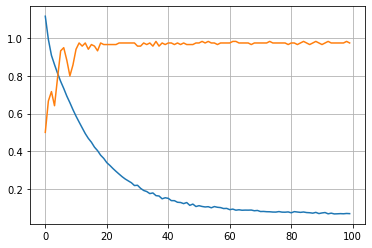

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy'])
plt.grid()
plt.show()

# epochs = 20 부근에서 accuracy는 100% 에 근접하고, 
# epochs = 60~ 부근부터 최저 손실율에 도달함을 볼 수 있다.